In [5]:
adress = 'C:/Python'
#adress =  'C:/Users/LENOVO/OneDrive'

In [6]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import xarray as xr; from sklearn.cluster import KMeans

## Abro la data

In [7]:
level=200

In [8]:
#aa=xr.open_dataset(adress+'/Documents/Python/data/ERA5/vectorU_1960_1978_ERA5.nc') # viento zonal: oeste a este
#bb=xr.open_dataset(adress+'/Documents/Python/data/ERA5/vectorV_1960_1978_ERA5.nc') # viento meridional: sur a norte

a=xr.open_dataset(adress+'/data/ERA5/vectorU_1979_2022_ERA5.nc') # viento zonal: oeste a este
b=xr.open_dataset(adress+'/data/ERA5/vectorV_1979_2022_ERA5.nc') # viento meridional: sur a norte

a3=xr.open_dataset(adress+'/data/ERA5/vectorU_2023_2024_ERA5.nc') # viento zonal: oeste a este
b3=xr.open_dataset(adress+'/data/ERA5/vectorV_2023_2024_ERA5.nc') # viento meridional: sur a norte

ab25 = xr.open_dataset(adress+'/data/ERA5/vectorUV_2025_ERA5.nc')

In [9]:
a3=a3.sel(pressure_level=level,latitude=np.arange(10,-30.5, -0.5),longitude=np.arange(-90,-29.5,0.5),valid_time=slice('2023-01-01','2024-12-31'))
a3=a3.sortby('latitude',ascending=True)
a3=a3.sel(valid_time=~((a3.valid_time.dt.month == 2) & (a3.valid_time.dt.day == 29)))
b3=b3.sel(pressure_level=level,latitude=np.arange(10,-30.5, -0.5),longitude=np.arange(-90,-29.5,0.5),valid_time=slice('2023-01-01','2024-12-31'))
b3=b3.sortby('latitude',ascending=True)
b3=b3.sel(valid_time=~((b3.valid_time.dt.month == 2) & (b3.valid_time.dt.day == 29)))

a=a.sel(level=level,latitude=np.arange(10,-30.5, -0.5),longitude=np.arange(-90,-29.5,0.5),time=slice('1979-01-01','2022-12-31'), expver = 1)
a=a.sortby('latitude',ascending=True)
a=a.sel(time=~((a.time.dt.month == 2) & (a.time.dt.day == 29)))
b=b.sel(level=level,latitude=np.arange(10,-30.5, -0.5),longitude=np.arange(-90,-29.5,0.5),time=slice('1979-01-01','2022-12-31'), expver = 1)
b=b.sortby('latitude',ascending=True)
b=b.sel(time=~((b.time.dt.month == 2) & (b.time.dt.day == 29)))

#aa=aa.sel(pressure_level=level,latitude=np.arange(10,-30.5, -0.5),longitude=np.arange(-90,-29.5,0.5),valid_time=slice('1960-01-01','1978-12-31'))
#aa=aa.sortby('latitude',ascending=True)
#aa=aa.sel(valid_time=~((aa.valid_time.dt.month == 2) & (aa.valid_time.dt.day == 29)))
#bb=bb.sel(pressure_level=level,latitude=np.arange(10,-30.5, -0.5),longitude=np.arange(-90,-29.5,0.5),valid_time=slice('1960-01-01','1978-12-31'))
#bb=bb.sortby('latitude',ascending=True)
#bb=bb.sel(valid_time=~((bb.valid_time.dt.month == 2) & (bb.valid_time.dt.day == 29)))

ab25=ab25.sel(pressure_level=level,latitude=np.arange(10,-30.5, -0.5),longitude=np.arange(-90,-29.5,0.5),valid_time=slice('2025-01-01','2025-12-31'))
ab25=ab25.sortby('latitude',ascending=True)
ab25=ab25.sel(valid_time=~((ab25.valid_time.dt.month == 2) & (ab25.valid_time.dt.day == 29)))

In [10]:
lon=a.longitude.values
lat=a.latitude.values
nlon=lon.shape[0]
nlat=lat.shape[0]
ns=nlat*nlon
ns,nlat,nlon

(9801, 81, 121)

In [11]:
# Renombrar la dimensión  a 'time'
a3 = a3.rename({'valid_time': 'time'}); #aa = aa.rename({'valid_time': 'time'})
b3 = b3.rename({'valid_time': 'time'}); #bb = bb.rename({'valid_time': 'time'})
ab25 = ab25.rename({'valid_time': 'time'})

In [12]:
a = a.chunk({'time': 100}); aa = aa.chunk({'time': 100});a3 = a3.chunk({'time': 100})
b = b.chunk({'time': 100}); bb = bb.chunk({'time': 100});b3 = b3.chunk({'time': 100})

NameError: name 'aa' is not defined

In [13]:
#aa=aa.drop_vars(['number','pressure_level','expver'])  # Elimina la coordenada extra
a=a.drop_vars(['level','expver'])
a3=a3.drop_vars(['number','pressure_level','expver'])

#bb=bb.drop_vars(['number','pressure_level','expver'])  # Elimina la coordenada extra
b=b.drop_vars(['level','expver'])
b3=b3.drop_vars(['number','pressure_level','expver'])

ab25=ab25.drop_vars(['number','pressure_level','expver'])

In [22]:
newa=xr.concat([a,a3],dim='time') #aa,#desde 1960
newb=xr.concat([b,b3],dim='time') #bb

uv=xr.concat([xr.merge([newa,newb]),ab25],dim='time')

In [10]:
uv=uv.chunk({'time': 'auto', 'latitude': 'auto', 'longitude': 'auto'})
uv=uv.astype('float32')

In [21]:
(2024-1979+1)*365+31+28+31+30

16910

In [23]:
uv

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 16910, latitude: 81, longitude: 121)
Coordinates:
  * longitude  (longitude) float32 484B -90.0 -89.5 -89.0 ... -31.0 -30.5 -30.0
  * latitude   (latitude) float32 324B -30.0 -29.5 -29.0 -28.5 ... 9.0 9.5 10.0
  * time       (time) datetime64[ns] 135kB 1979-01-01 1979-01-02 ... 2025-04-30
Data variables:
    u          (time, latitude, longitude) float64 1GB dask.array<chunksize=(100, 81, 121), meta=np.ndarray>
    v          (time, latitude, longitude) float64 1GB -6.391 -7.606 ... -8.652
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-29 01:31:00 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [26]:
#Eligo el rango de fechas de las etiquetas
fecha_in = '1979-01-01'
fecha_fin = '2025-04-30'

uv=uv.sel(time=slice(fecha_in,fecha_fin))
uv=uv.sel(time=~((uv.time.dt.month == 2) & (uv.time.dt.day == 29)))

In [27]:
uv

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 16910, latitude: 81, longitude: 121)
Coordinates:
  * longitude  (longitude) float32 484B -90.0 -89.5 -89.0 ... -31.0 -30.5 -30.0
  * latitude   (latitude) float32 324B -30.0 -29.5 -29.0 -28.5 ... 9.0 9.5 10.0
  * time       (time) datetime64[ns] 135kB 1979-01-01 1979-01-02 ... 2025-04-30
Data variables:
    u          (time, latitude, longitude) float64 1GB dask.array<chunksize=(100, 81, 121), meta=np.ndarray>
    v          (time, latitude, longitude) float64 1GB -6.391 -7.606 ... -8.652
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-29 01:31:00 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [28]:
uv.to_netcdf(adress+f'/data/ERA5/windERA5_200hPa_1979_2024.nc')

In [ ]:
#newa.sel(time=slice('1960','1960')).u.values # 3min por año para extraer values sin nans

In [13]:
# Calculando las anomalias de viento
# Promedio temporal en cada punto de la region
dayprom=uv.mean({'time'})
daystd=uv.std({'time'})

# estandarizando
day=(uv-dayprom)/daystd

In [14]:
day=day.chunk({'time': 250, 'latitude': 50, 'longitude': 50})

In [ ]:
from dask.distributed import Client
# Usar 20 trabajadores y 1 hilo por trabajador
client = Client(n_workers=24, threads_per_worker=2)
# Verificar el estado del cliente
print(client)

<Client: 'tcp://127.0.0.1:50528' processes=24 threads=48, memory=31.72 GiB>


2025-07-10 22:35:48,548 - distributed.scheduler - WARNING - Worker failed to heartbeat for 6999s; attempting restart: <WorkerState 'tcp://127.0.0.1:50627', name: 22, status: running, memory: 0, processing: 0>
2025-07-10 22:35:48,548 - distributed.scheduler - WARNING - Worker failed to heartbeat for 6999s; attempting restart: <WorkerState 'tcp://127.0.0.1:50628', name: 4, status: running, memory: 0, processing: 0>
2025-07-10 22:35:48,548 - distributed.scheduler - WARNING - Worker failed to heartbeat for 6999s; attempting restart: <WorkerState 'tcp://127.0.0.1:50629', name: 11, status: running, memory: 0, processing: 0>
2025-07-10 22:35:48,548 - distributed.scheduler - WARNING - Worker failed to heartbeat for 6999s; attempting restart: <WorkerState 'tcp://127.0.0.1:50630', name: 21, status: running, memory: 0, processing: 0>
2025-07-10 22:35:48,548 - distributed.scheduler - WARNING - Worker failed to heartbeat for 6999s; attempting restart: <WorkerState 'tcp://127.0.0.1:50640', name: 6, 

In [17]:
#uu = uday.sel(time=slice('1960-01-01','1961-12-10')).u.values #2min n_workers=18, threads_per_worker=1
#uu

In [15]:
day=day.stack(grillas =['latitude','longitude'])
uday=day.u.values
vday=day.v.values
nt=uday.shape[0]
nt

16880

In [16]:
uday.shape

(16880, 9801)

In [17]:
## Reordenar los datos de manera que cada matriz de datos de cada dia se convierta en un vector
matr=[]
for i in range(np.size(uday,0)):
    ut=uday[i,:] #datos u del dia i
    vt=vday[i,:] #datos v del dia i
    
    # se obtiene la matriz ut para cada punto de la region sin separar en latitud/longitud
    #como resultado se obtiene matriz unidimensional del tamaño nlon*nlat
       
    # Formando el vector viento en cada punto de la region
    
    total=np.concatenate((ut,vt))     # Vector con datos de viento zonales y meridionales del dia i (19602 datos = 2* (121*81))
    matr.append(total) # matriz de longitud 15330, vector de viento de cada dia i
matr = np.asarray(matr)
matr[np.isnan(matr)],matr.shape

(array([], dtype=float32), (16880, 19602))

In [18]:
U, sigma, Vt = np.linalg.svd(matr, full_matrices=False) # EOFs: 18-27min

M = U@np.diag(sigma)@Vt
M.shape

(16880, 19602)

In [19]:
U.shape,sigma.shape,Vt.shape

((16880, 16880), (16880,), (16880, 19602))

In [20]:
M-matr

array([[-2.9802322e-07, -3.8743019e-07, -8.9406967e-08, ...,
        -1.1175871e-07, -1.5646219e-07, -3.5762787e-07],
       [ 1.4901161e-07,  2.9802322e-08,  8.9406967e-08, ...,
         7.1525574e-07,  0.0000000e+00,  2.3841858e-07],
       [ 3.4272671e-07,  2.3841858e-07, -4.4703484e-08, ...,
        -9.5367432e-07,  4.7683716e-07,  1.0728836e-06],
       ...,
       [ 4.7683716e-07,  0.0000000e+00,  0.0000000e+00, ...,
        -4.1723251e-07, -2.0861626e-07,  2.0861626e-07],
       [ 2.9802322e-07, -7.1525574e-07,  6.5565109e-07, ...,
        -1.7881393e-07, -1.1920929e-07,  1.1920929e-07],
       [ 0.0000000e+00,  9.5367432e-07, -9.5367432e-07, ...,
        -1.8626451e-09,  2.9802322e-07,  1.4901161e-08]], dtype=float32)

## Eligo numero de PCs y aplico kmeans

In [21]:
matr.shape

(16880, 19602)

In [22]:
#Varianza total de los PCs
var_sigma = (sigma**2).sum()
#Varianza total de los datos
var_datos = (matr**2).sum()

print(f'Error relativo: {(var_datos-var_sigma)*100/(var_datos):.2f} %')

Error relativo: 0.00 %


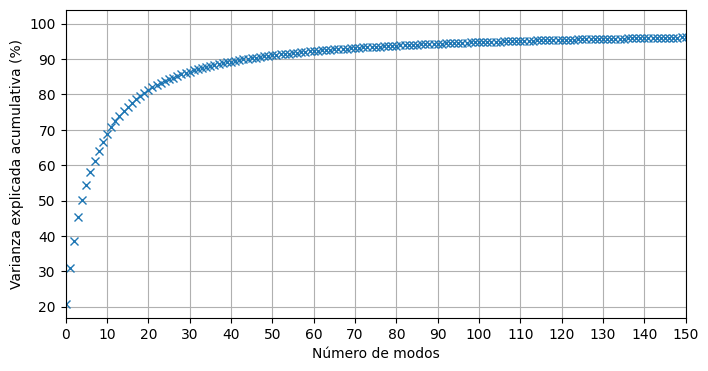

In [23]:
plt.figure(figsize=(8,4))
plt.plot((sigma**2).cumsum()*100/(var_datos), 'x')  # Divide by number of entries in SST
                                              # to plot a cumulative mean square variance. 
limmax=150
plt.xlim(0,limmax)
plt.xticks(np.arange(0,limmax+1,10))
plt.xlabel('Número de modos')
plt.ylabel('Varianza explicada acumulativa (%)')
plt.grid()
plt.show()
plt.close()

In [24]:
num_PCs = 40
var = np.full((num_PCs,1), np.nan)
for i in range(num_PCs):
    var[i] = sigma[i]**2/(var_datos) #varianza explicada por cada PC

var_numPCs =np.sum(var)*100
print(f'Varianza total explicada por los {num_PCs} primeros PCs: {var_numPCs:.2f} %')

Varianza total explicada por los 40 primeros PCs: 89.05 %


In [25]:
U_k = U[:, :num_PCs]      # Primeras xx columnas de U 
Sigma_k = np.diag(sigma[:num_PCs])
PCs = U_k @ Sigma_k

In [27]:
np.save(adress+fr'/V_ERA5_1979-2025.npy',Vt.T[:,:num_PCs])

In [28]:
# Estadisticas de los CPs, realizando los clusters
kmeans=KMeans(n_clusters=9,random_state=0,n_init=10).fit(PCs)
cps=kmeans.labels_+1
centers = kmeans.cluster_centers_
cps

array([8, 8, 8, ..., 6, 6, 6], dtype=int32)

## Tabla de comparación, identificando CPs

In [29]:
#cpsRef=np.loadtxt(adress+'/Documents/Python/data/Resultados/cps_850hPa_1979-2024_ordOlmo.txt').astype(int)[:365*45:]
#cpsRef

array([2, 2, 2, ..., 8, 1, 3], shape=(16425,))

In [39]:
cpsRef=xr.open_dataset(adress+'\data\Resultados\cps_200hPa_1979-01-01_2024-12-31.nc')
cpsRef = cpsRef.sel(time=slice('1979-01-01','2024-12-31')).cps.values

In [40]:
cpsRef.shape

(16790,)

In [41]:
cps.copy()[:len(cpsRef)].shape

(16790,)

In [43]:
matriz_coinc = np.zeros((9, 9))
#cpsx = cps[(1979-1960)*365:][:365*45]#cps[1979-1960::]
#cpsx = xr.open_dataset(adress+'/Documents/Python/data/Resultados/cps_200hPa_1979-01-01_2024-12-31.nc').cps.values
#cpsx = xr.open_dataset(adress+'/Documents/Python/data/Resultados/cps_850hPa_1979-01-01_2024-12-31.nc').cps.values

#cpsx=cps.copy()[:len(cpsRef)]
cpsx = xr.open_dataset(adress+'\data\Resultados\cps_200hPa_1979-01-01_2025-03-31.nc').cps.values[:len(cpsRef)]

for i in range(1, 10): #fila (850hPa)
    for j in range(1, 10): #columna (200hPa)
        tot = np.sum(cpsRef == i)
        matriz_coinc[i-1, j-1] = (np.sum((cpsRef == i) & (cpsx == j))/tot)*100

CP_200 = ['1-REF','2-REF','3-REF','4-REF','5-REF','6-REF','7-REF','8-REF','9-REF']
CP_ = ['CP1','CP2','CP3','CP4','CP5','CP6','CP7','CP8','CP9']

df = pd.DataFrame(matriz_coinc, columns=CP_, index=CP_200)
df = df.round(1)
df=df.reset_index()
df

,index,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9
0,1-REF,97.8,0.3,0.4,0.0,1.5,0.0,0.0,0.0,0.0
1,2-REF,3.1,96.4,0.0,0.0,0.4,0.0,0.0,0.0,0.0
2,3-REF,0.2,6.3,93.2,0.0,0.1,0.0,0.0,0.1,0.0
3,4-REF,0.0,0.2,0.8,97.4,0.0,1.3,0.3,0.1,0.0
4,5-REF,0.1,0.1,1.2,0.5,97.1,0.3,0.1,0.5,0.2
5,6-REF,0.0,0.0,0.0,2.4,0.2,91.4,0.0,5.5,0.4
6,7-REF,0.1,0.0,0.0,0.1,0.2,1.9,96.7,0.0,1.1
7,8-REF,0.0,0.1,0.0,0.7,0.0,0.0,3.0,95.5,0.7
8,9-REF,0.0,0.0,0.0,0.0,0.0,0.7,0.4,0.3,98.7


#Hasta 2014
1 es 2-w2
2 es 8-d3
3 es 6-d1
4 es 9-d4
5 es 3-w3
6 es 4-t1
7 es 7-d2
8 es 1-w1
9 es 5-t2

#Hasta 2025
1 es 5-t2
2 es 4-t1
3 es 8-d3
4 es 2-w2
5 es 9-d4
6 es 3-w3
7 es 7-d2
8 es 1-w1
9 es 6-d1

## Cambio de etiqueta de CPs

In [30]:
df_labels = pd.DataFrame(np.vstack([np.arange(1,10),np.array([5,4,8,2,9,3,7,1,6])]).T, 
                         columns=['Etiqueta actual','Etiq. Referencia'])
df_labels

,Etiqueta actual,Etiq. Referencia
0,1,5
1,2,4
2,3,8
3,4,2
4,5,9
5,6,3
6,7,7
7,8,1
8,9,6


In [34]:
newcenters = np.full_like(centers,np.nan)
for i in range(9):
    cp = df_labels.iloc[i].iloc[0]; cpRef = df_labels.iloc[i].iloc[1]
    newcenters[cpRef-1,:] = centers[cp-1,:]
np.save(adress+f'/data/Resultados/centers_{level}hPa_{fecha_in}_{fecha_fin}.npy',newcenters)

In [32]:
ncps=np.zeros_like(cps)
for i in range(9):
    aa=np.where(cps==i+1)
    cpRef = df_labels.iloc[i].iloc[1]
    for j in aa:
        ncps[j]= cpRef
cps = ncps

In [33]:
cps

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

## Convirtiendo a xarray netcdf

In [111]:
#adress = 'C:/Users/User/OneDrive' 
#adress =  'C:/Users/LENOVO/OneDrive'
import numpy as np
import pandas as pd
import xarray as xr

In [113]:
#Cargo el archivo de cps como numpy-array o lista
#cps = np.loadtxt(adress+'/Documents/Python/data/Resultados/cps_200hPa_1979-2024.txt').astype(int)

#Información relevante
#num_PCs = 30
#var_numPCs = 85.7
#level = 200

#Eligo el rango de fechas de las etiquetas
#fecha_in = '1979-01-01'
#fecha_fin= '2024-12-31'
fechas=pd.date_range(start=fecha_in, end=fecha_fin, freq="D",inclusive='both') #incluye ambos limites de inicio y fin
fechas = fechas[~((fechas.month == 2) & (fechas.day == 29))] #elimino 29 de años bisiestos

#Creo un datarframe con los datos y los convierto a xarray
df = pd.DataFrame({'time': fechas,'cps': cps})
ds = df.set_index('time').to_xarray()

#Agrego información importante
ds.attrs['info-general'] = f'Etiquetas de Circulation patterns (CPs) obtenidos de vientos horizontales diarios a {level}-hPa desde {fecha_in} hasta {fecha_fin}. Los días 29/02 de año bisiestos fueron eliminados.'
ds.attrs['info-PCA'] = f'La clasificación/clustering se realizó utilizando las primeras {num_PCs} componentes principales derivados del análisis de componentes principales (PCA), los cuales explican el {var_numPCs:.2f} % de variabilidad de los datos de viento originales.'

#OPCIONALES
ds.attrs['info-CPs'] = f'Las etiquetas de los CPs varían del 1 al 9 y están ordenadas según Milla et al. (2025) (W1, W2, W3, T1, T2, D1, D2, D3, D4), respectivamente.'
#ds.attrs['info-CPs'] = f'Las etiquetas de los CPs varían del 1 al 9 y están ordenadas según Olmo et al. (2022) (S1, S2, S3, W1, W2, W3, T1, T2dw, T3wd), respectivamente.'


# Guardar como archivo NetCDF
ds.to_netcdf(adress+f'/data/Resultados/cps_{level}hPa_{fecha_in}_{fecha_fin}.nc')


# Guardar como archivo NetCDF
np.save(adress+f'/data/Resultados/centers_{level}hPa_{fecha_in}_{fecha_fin}.npy',newcenters)
ds

<xarray.Dataset> Size: 158kB
Dimensions:  (time: 13140)
Coordinates:
  * time     (time) datetime64[ns] 105kB 1979-01-01 1979-01-02 ... 2014-12-31
Data variables:
    cps      (time) int32 53kB 1 1 1 1 1 1 1 1 1 1 1 1 ... 3 1 1 1 1 1 1 1 2 1 1
Attributes:
    info-general:  Etiquetas de Circulation patterns (CPs) obtenidos de vient...
    info-PCA:      La clasificación/clustering se realizó utilizando las prim...
    info-CPs:      Las etiquetas de los CPs varían del 1 al 9 y están ordenad...

## Grafico de ciclo anual de CPs

### CPs a 850

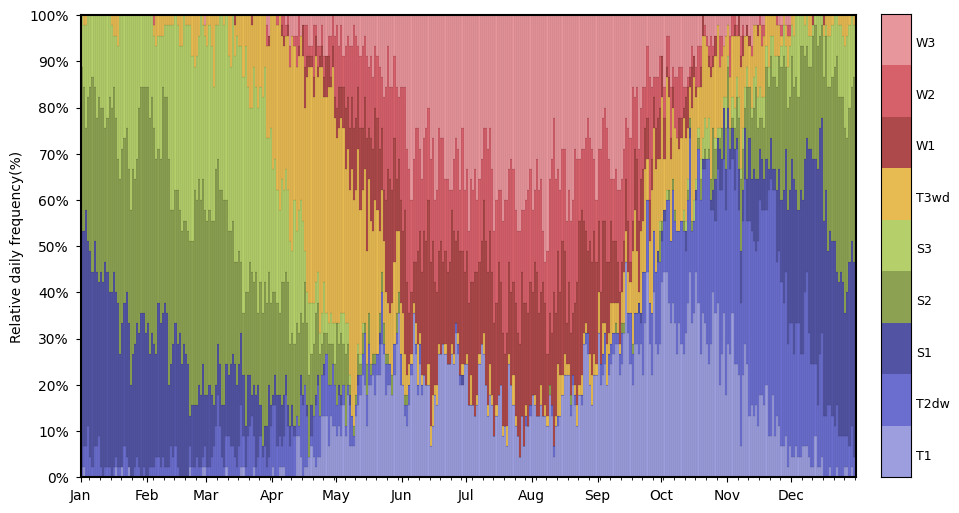

In [62]:
import calendar
conteo=np.zeros((9,365))
#time=pd.date_range(start='01/01/1979',end='12/31/1979',freq='D')

ncps=np.zeros_like(cps)
for i in range(1,10):
    aa=np.where(cps==i)
    for j in aa:
        if i==1:
            ncps[j]= 3 #9
        if i==2:
            ncps[j]= 4 #2
        if i==3:
            ncps[j]= 5  #6
        if i==4:
            ncps[j]= 7  #7
        if i==5:
            ncps[j]= 8 #8
        if i==6:
            ncps[j]= 9 #4
        if i==7:
            ncps[j]= 1 #3
        if i==8:
            ncps[j]= 2 #5
        if i==9:
            ncps[j]= 6 #1

ncps = ncps[:365*45:].reshape(-1,365)

for i in range(np.size(conteo,0)):#9
    matBool = ncps==(i+1) #matriz booleana con informacion de los dias del CP i
    for j in range(np.size(conteo,1)):#365
        s=np.sum(matBool[:,j]) #suma sobre los 42 años para el mismo dia j
        s=s/np.size(ncps,0)
        conteo[i,j]=s
        
from matplotlib.ticker import MultipleLocator, ScalarFormatter 

dias = np.arange(1, 366)  # Un array con los días del mes

# Apilamos las frecuencias en un array 2D
frecuencias = conteo #np.vstack([cp1, cp2, cp3,cp4,cp5,cp6,cp7,cp8,cp9])

fig, ax = plt.subplots(figsize=(10,6))

# Usamos la función bar para crear barras apiladas
bottom = np.zeros_like(dias, dtype=float)
colors = plt.colormaps['Set3'](np.linspace(0.2, 0.9, frecuencias.shape[0]))  # Paleta de colores
custom_colors = ['#9c9ede','#6b6ecf','#5254a3','#8ca252','#b5cf6b','#e7ba52','#ad494a','#d6616b','#e7969c']
CP_names = ['W1','W2','W3','T1','T2','D1','D2','D3','D4']
valores = np.arange(0,1.1,1/9)

for i in range(frecuencias.shape[0]):
    ax.bar(dias, frecuencias[i], label=f'{CP_names[i]}', bottom=bottom, width=1,
           color=custom_colors[i],alpha=1, align='edge', linewidth=0.05,edgecolor='black')
    bottom += frecuencias[i]
    
ax.xaxis.set_minor_locator(MultipleLocator(5)) 
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.tick_params(axis ='both', which ='minor', labelsize = 1, colors ='black', labelcolor='white')
# Configuración para mostrar los meses en el eje x
posMonth = np.array([1, 31,28,31,30,31,30,31,31,30,31,30])
month_names = [calendar.month_abbr[i] for i in range(1, 13)]  # Obtener nombres de los meses
ax.set_xticks(np.cumsum(posMonth))  # Establecer ubicación de los ticks mensuales
ax.set_xticklabels(month_names)  # Establecer etiquetas de los ticks como nombres de los meses
ax.tick_params(axis ='both', which ='major', labelsize = 10, pad = 5, colors ='black')

yticks = np.linspace(0, 1, 11)  # Puedes ajustar los límites y el paso según tus necesidades
ax.set_yticks(yticks)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])

# Crear la barra grande de la leyenda
legend_labels = [f'CP-{str(i)}' for i in range(frecuencias.shape[0])]

ax.set_xlim(1, 365.5)
ax.set_ylabel("Relative daily frequency(%)")
#ax.legend(loc='upper left', bbox_to_anchor=(1, 1.015), frameon=False)
for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        
# AÑADO BARRA DE CPs

pos = ax.get_position()

left, bottom, width, height = .8, -0.0005,0.03, 0.773 # Ajusta estos valores según sea necesario
newaxs = fig.add_axes([pos.x0 + left, pos.y0 + bottom, width, height])
nn = newaxs.twinx()

for i in range(9):
    nn.bar(1,valores[9-i], color=custom_colors[8-i])


nn.set_yticks(valores[:-1:]+0.05)
nn.set_yticklabels(['T1', 'T2dw', 'S1', 'S2', 'S3', 'T3wd', 'W1', 'W2', 'W3'])
nn.set_ylim(0,1)
nn.tick_params(length=0.1, labelsize=9)

newaxs.set_xticks([])
newaxs.set_yticks([])
newaxs.set_xlim(0.8,1.2)

for spine in newaxs.spines.values():
        spine.set_linewidth(.5)

#plt.title("Frecuencias relativas CPs a 200hPa - NV")
#plt.savefig(os.path.join('figures','PaperFig','2.1Frequency_CPs_200_1979_2022.2.png'),bbox_inches='tight',pad_inches=0.1, dpi=350)
plt.show()

### CPs a 200hpa

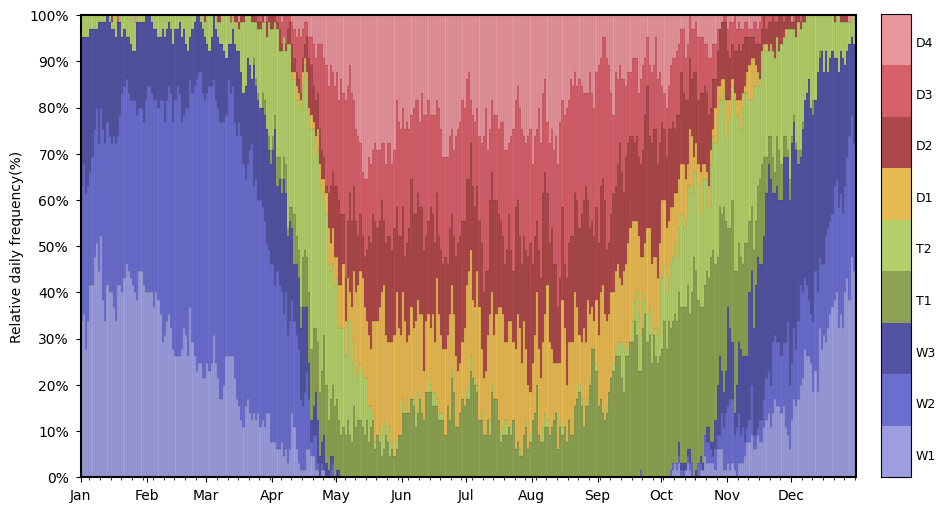

In [36]:
import calendar
conteo=np.zeros((9,365))
#time=pd.date_range(start='01/01/1979',end='12/31/1979',freq='D')

ncps = cps.reshape(-1,365)
for i in range(np.size(conteo,0)):#9
    matBool = ncps==(i+1) #matriz booleana con informacion de los dias del CP i
    for j in range(np.size(conteo,1)):#365
        s=np.sum(matBool[:,j]) #suma sobre los 42 años para el mismo dia j
        s=s/np.size(ncps,0)
        conteo[i,j]=s
        
from matplotlib.ticker import MultipleLocator, ScalarFormatter 

dias = np.arange(1, 366)  # Un array con los días del mes

# Apilamos las frecuencias en un array 2D
frecuencias = conteo #np.vstack([cp1, cp2, cp3,cp4,cp5,cp6,cp7,cp8,cp9])

fig, ax = plt.subplots(figsize=(10,6))

# Usamos la función bar para crear barras apiladas
bottom = np.zeros_like(dias, dtype=float)
colors = plt.colormaps['Set3'](np.linspace(0.2, 0.9, frecuencias.shape[0]))  # Paleta de colores
custom_colors = ['#9c9ede','#6b6ecf','#5254a3','#8ca252','#b5cf6b','#e7ba52','#ad494a','#d6616b','#e7969c']
CP_names = ['W1','W2','W3','T1','T2','D1','D2','D3','D4']
valores = np.arange(0,1.1,1/9)

for i in range(frecuencias.shape[0]):
    ax.bar(dias, frecuencias[i], label=f'{CP_names[i]}', bottom=bottom, width=1,
           color=custom_colors[i],alpha=1, align='edge', linewidth=0.05,edgecolor='black')
    bottom += frecuencias[i]
    
ax.xaxis.set_minor_locator(MultipleLocator(5)) 
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.tick_params(axis ='both', which ='minor', labelsize = 1, colors ='black', labelcolor='white')
# Configuración para mostrar los meses en el eje x
posMonth = np.array([1, 31,28,31,30,31,30,31,31,30,31,30])
month_names = [calendar.month_abbr[i] for i in range(1, 13)]  # Obtener nombres de los meses
ax.set_xticks(np.cumsum(posMonth))  # Establecer ubicación de los ticks mensuales
ax.set_xticklabels(month_names)  # Establecer etiquetas de los ticks como nombres de los meses
ax.tick_params(axis ='both', which ='major', labelsize = 10, pad = 5, colors ='black')

yticks = np.linspace(0, 1, 11)  # Puedes ajustar los límites y el paso según tus necesidades
ax.set_yticks(yticks)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])

# Crear la barra grande de la leyenda
legend_labels = [f'CP-{str(i)}' for i in range(frecuencias.shape[0])]

ax.set_xlim(1, 365.5)
ax.set_ylabel("Relative daily frequency(%)")
#ax.legend(loc='upper left', bbox_to_anchor=(1, 1.015), frameon=False)
for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        
# AÑADO BARRA DE CPs

pos = ax.get_position()

left, bottom, width, height = .8, -0.0005,0.03, 0.773 # Ajusta estos valores según sea necesario
newaxs = fig.add_axes([pos.x0 + left, pos.y0 + bottom, width, height])
nn = newaxs.twinx()

for i in range(9):
    nn.bar(1,valores[9-i], color=custom_colors[8-i])


nn.set_yticks(valores[:-1:]+0.05)
nn.set_yticklabels(['W1','W2','W3','T1','T2','D1','D2','D3','D4'])
nn.set_ylim(0,1)
nn.tick_params(length=0.1, labelsize=9)

newaxs.set_xticks([])
newaxs.set_yticks([])
newaxs.set_xlim(0.8,1.2)

for spine in newaxs.spines.values():
        spine.set_linewidth(.5)

#plt.title("Frecuencias relativas CPs a 200hPa - NV")
#plt.savefig(os.path.join('figures','PaperFig','2.1Frequency_CPs_200_1979_2022.2.png'),bbox_inches='tight',pad_inches=0.1, dpi=350)
plt.show()